# Logistic Regression with Sklearn

### Ask questions and define the problem.

Here we are attempting to predict whether a person will develop diabates in the future based on 8 features related to their health.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Preparing data by collecting and storing the information.

In [28]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Processing data by cleaning and checking the information.

In [33]:

df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [60]:
df.shape

(768, 9)

### Analyze data to find patterns, relationships, and trends.

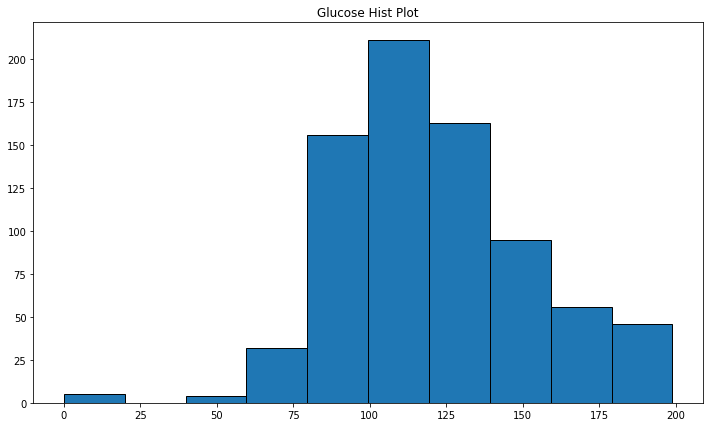

In [34]:
plt.figure(figsize = (12, 7))
plt.hist("Glucose", data = df, edgecolor = "k")
plt.title("Glucose Hist Plot")
plt.show()

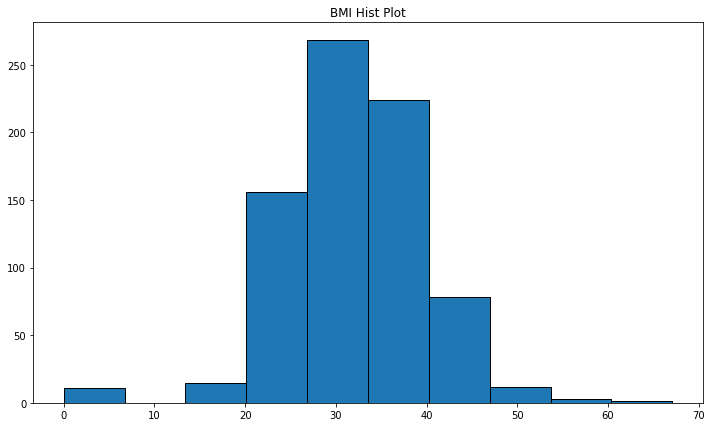

In [35]:
plt.figure(figsize = (12, 7))
plt.hist("BMI", data = df, edgecolor = "k")
plt.title("BMI Hist Plot")
plt.show()

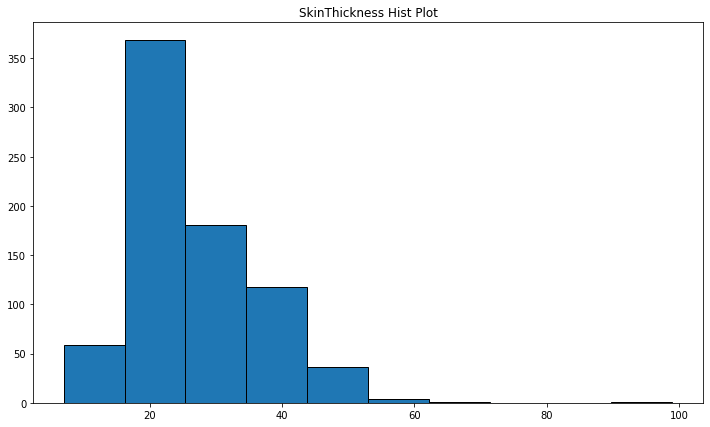

In [36]:
plt.figure(figsize = (12, 7))
plt.hist("SkinThickness", data = df, edgecolor = "k")
plt.title("SkinThickness Hist Plot")
plt.show()

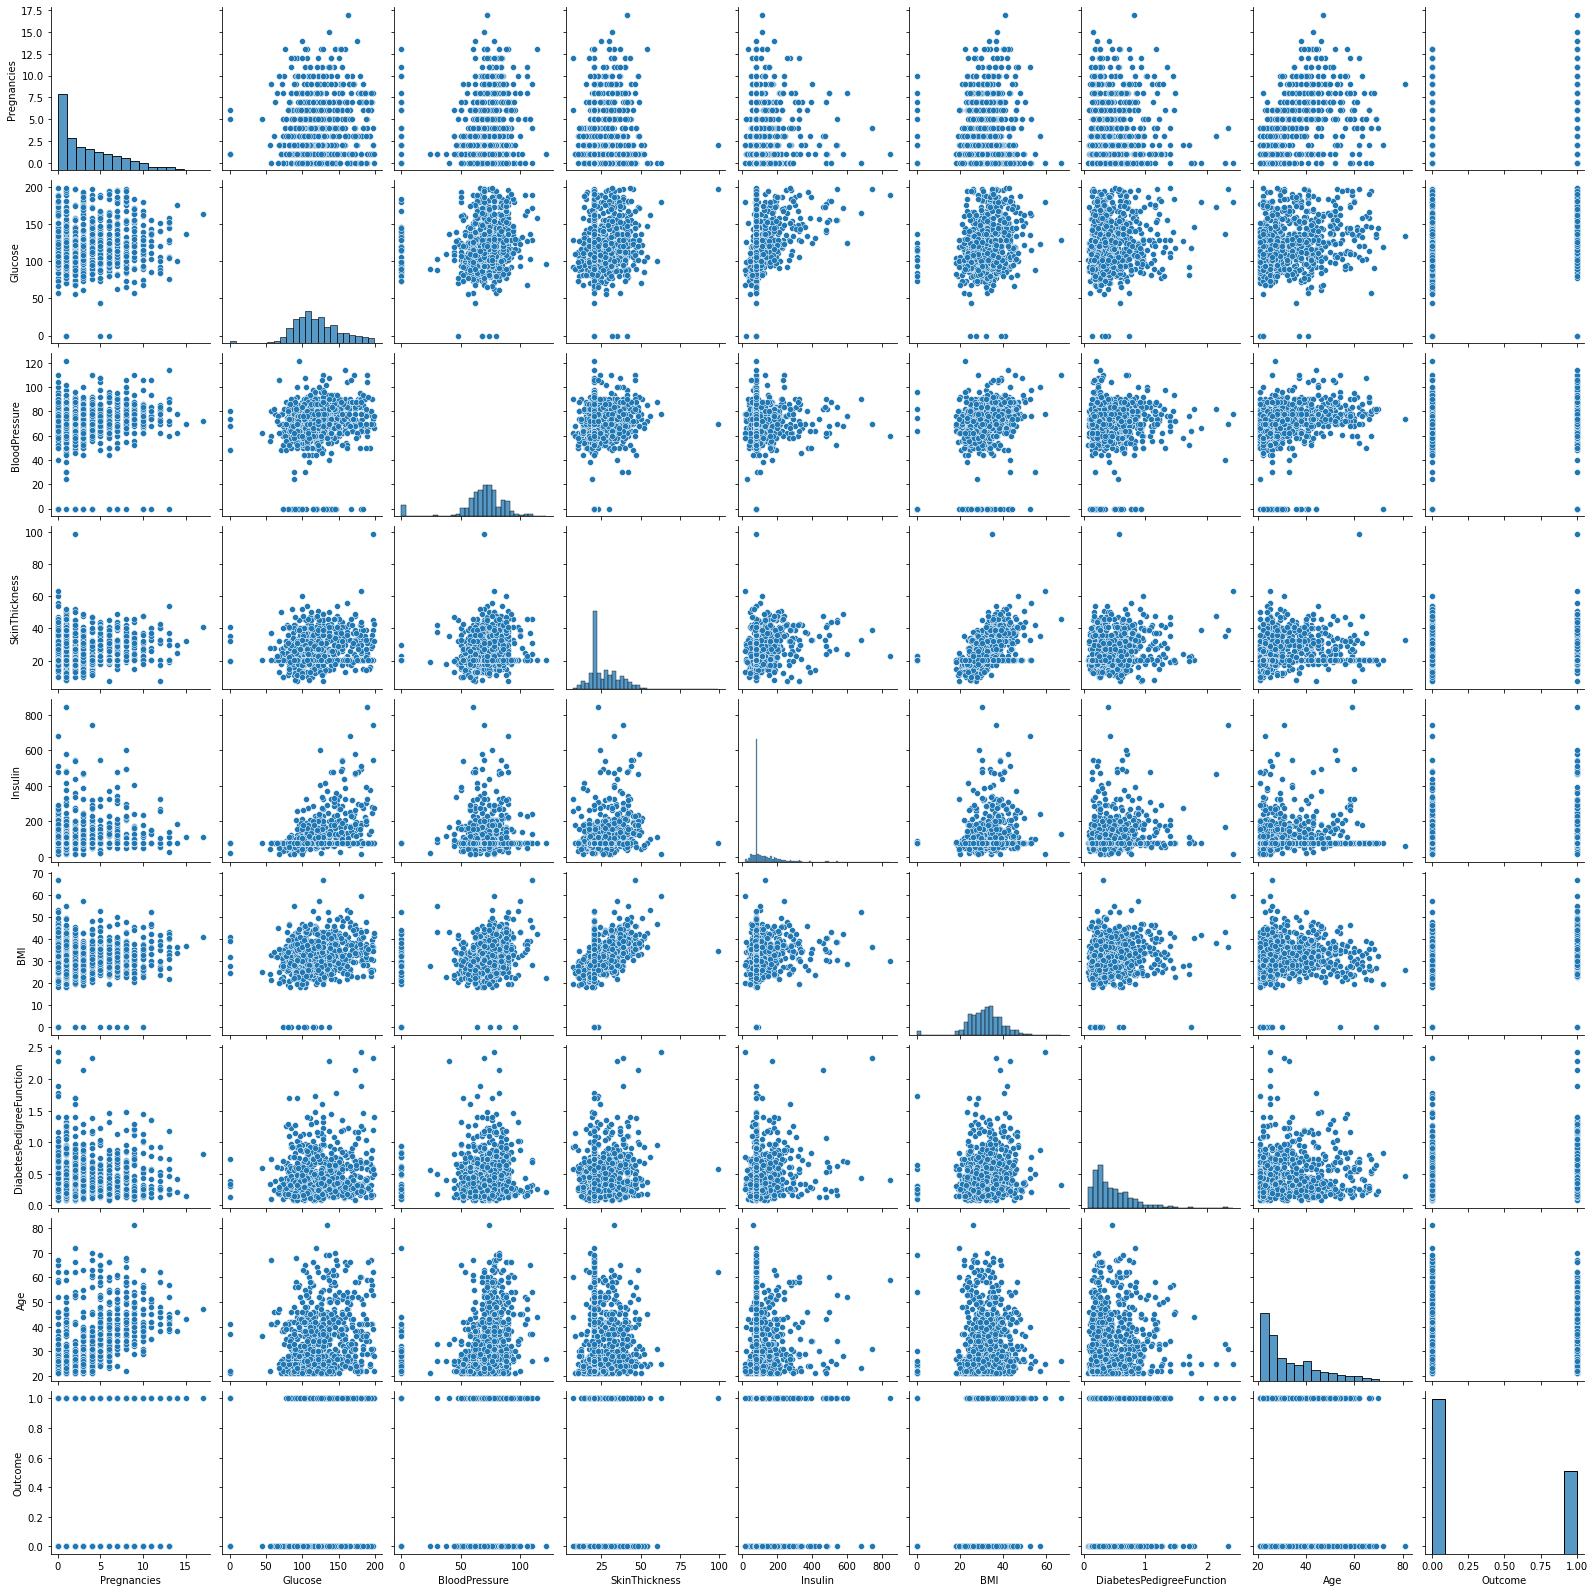

In [39]:
sns.pairplot(df)

### Training and testing the model

In [44]:
#splitting

from sklearn.model_selection import train_test_split

In [45]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [47]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,20.536458,79.799479,0.0,0.304,21
618,9,112,82,24.000000,79.799479,28.2,1.282,50
346,1,139,46,19.000000,83.000000,28.7,0.654,22
294,0,161,50,20.536458,79.799479,21.9,0.254,65
231,6,134,80,37.000000,370.000000,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,0,20.536458,79.799479,42.4,0.205,29


In [ ]:
### Building the model

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logReg = LogisticRegression()

In [50]:
logReg.fit(X_train, y_train)

c:\Users\Jonbi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Testing for accuracy

In [51]:
logReg.score(X_test, y_test)

0.7532467532467533

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
predictions = logReg.predict(X_test)

In [55]:
cm = confusion_matrix(y_test, predictions)

In [56]:
cm

array([[79, 20],
       [18, 37]], dtype=int64)

In [ ]:
### Evaluating the  model using a confusion matrix

<AxesSubplot: >

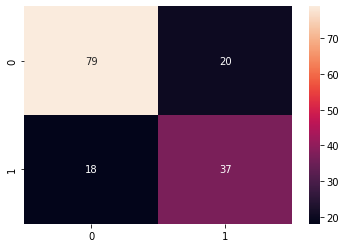

In [57]:
sns.heatmap(cm, annot = True)

### Final Results

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

